In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olympics_data = pd.read_csv('olympics_08_medalists.csv')
print(olympics_data)


# Rename "medalist_name" to "Medalist Name" before melting so that column names are consistent
olympics_data = olympics_data.rename(columns={'medalist_name': 'Medalist Name'})


# Melting the DataFrame: I will convert the sport and gender columns (ex: 'male_archery', 'female_archery') 
# into 2 different columns -  'Category' and 'Medal', which will describe if it was gold, silver or bronze. 

olympics_data_melted = pd.melt(olympics_data, 
                               id_vars=['Medalist Name'], 
                               var_name='Category', #Creating a new column 
                               value_name='Medal') #Assigning values as "medal"

olympics_data_melted = olympics_data_melted.dropna() #Dropping rows where no medal was won 

olympics_data_melted.head()

          medalist_name male_archery female_archery male_athletics  \
0       Aaron Armstrong          NaN            NaN           gold   
1         Aaron Peirsol          NaN            NaN            NaN   
2      Abdullo Tangriev          NaN            NaN            NaN   
3     Abeer Abdelrahman          NaN            NaN            NaN   
4               Abhinav          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
1870        Éver Banega          NaN            NaN            NaN   
1871  Ólafur Stefánsson          NaN            NaN            NaN   
1872      Óscar Brayson          NaN            NaN            NaN   
1873   Łukasz Pawłowski          NaN            NaN            NaN   
1874        Živko Gocić          NaN            NaN            NaN   

     female_athletics male_badminton female_badminton male_baseball  \
0                 NaN            NaN              NaN           NaN   
1                

,Medalist Name,Category,Medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold


In [252]:
# There are still multiple variales withing the 'category' column. This is why we will use str.split() in order to create new columns

print(olympics_data_melted.columns)
# Split the "Category" column into two: "Gender" and "Sport"
olympics_data_melted[['Gender', 'Sport']] = olympics_data_melted['Category'].str.split( '_', expand=True)

# Capitalizing names to make data look cleaner and organized
olympics_data_melted['Gender'] = olympics_data_melted['Gender'].str.title()
olympics_data_melted['Medal'] = olympics_data_melted['Medal'].str.title()
olympics_data_melted['Sport'] = olympics_data_melted['Sport'].str.title()


# Dropping the Original 'Category' column now that we have 2 new columns
olympics_data_melted = olympics_data_melted.drop(columns=['Category'])

#Reorder columns in a way that makes sense, having gender and sport before medal. 
olympics_data_melted = olympics_data_melted[['Medalist Name', 'Gender', 'Sport', 'Medal']]


# Display cleaned dataset
olympics_data_melted.head()


Index(['Medalist Name', 'Category', 'Medal'], dtype='object')


,Medalist Name,Gender,Sport,Medal
177,Bair Badënov,Male,Archery,Bronze
676,Ilario Di Buò,Male,Archery,Silver
682,Im Dong-hyun,Male,Archery,Gold
760,Jiang Lin,Male,Archery,Bronze
920,Lee Chang-hwan,Male,Archery,Gold


In [253]:
# Pivot Table 1 - Created to show the count of medals per sport, also including those won by men and those won by women.

medal_distribution = olympics_data_melted.pivot_table(index='Sport', 
                                                             columns='Gender', 
                                                             values='Medal', 
                                                             aggfunc='count', 
                                                             fill_value=0)

# Add a total medals column to see which sport had the highest amount of medals 
medal_distribution['Total Medals'] = medal_distribution.sum(axis=1)

# Sort sports by total medals won in descending order
medal_distribution = medal_distribution.sort_values(by='Total Medals', ascending=False)

medal_distribution.head()

Gender,Female,Male,Total Medals
Sport,,,
Athletics,81,85,166
Rowing,58,83,141
Swimming,63,62,125
Association Football,54,55,109
Field Hockey,48,50,98


/var/folders/s1/80f726k51wg6ls9g2m9zgfjw0000gn/T/ipykernel_18985/419304177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_medal_sports['Total Medals'], y=top_10_medal_sports.index, palette="Blues_d")


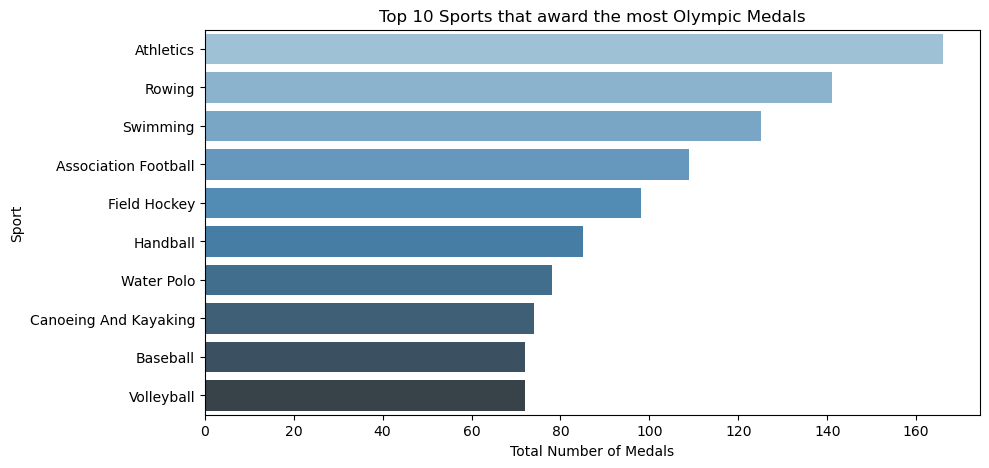

In [254]:
# Visualization 1 - Visualizing the Top 10 Sports that Award the Most Olympic Medals. This can give us an idea to which sports have more categories within them.

# Get top 10 sports by total medal count
top_10_medal_sports = medal_distribution.head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_medal_sports['Total Medals'], y=top_10_medal_sports.index, palette="Blues_d")

plt.title("Top 10 Sports that award the most Olympic Medals")
plt.xlabel("Total Number of Medals")
plt.ylabel("Sport")
plt.show()


/var/folders/s1/80f726k51wg6ls9g2m9zgfjw0000gn/T/ipykernel_18985/2410178996.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_10_medal_sports['Total Medals'], y=low_10_medal_sports.index, palette="Blues_d")


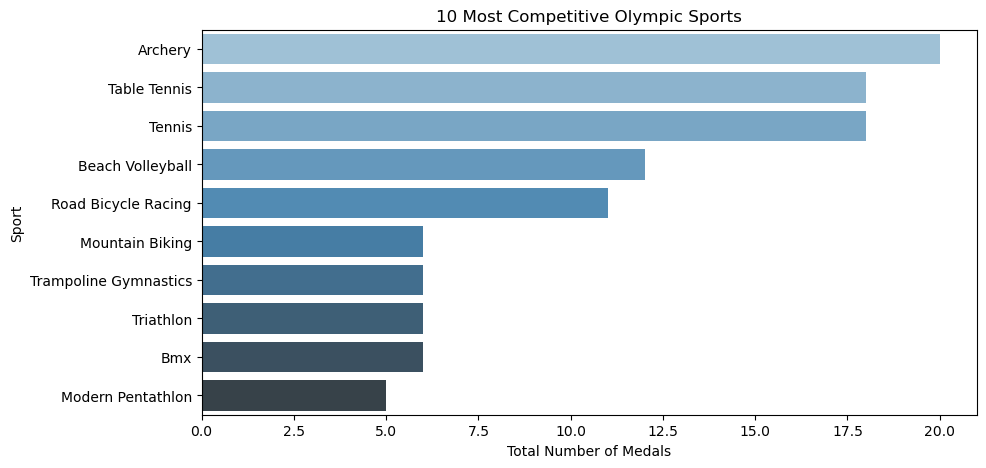

In [255]:
# Visualization 2 Continuation - 10 Sports with least medals given, most competitive sports 

# Get top 10 sports by total medal count
low_10_medal_sports = medal_distribution.tail(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=low_10_medal_sports['Total Medals'], y=low_10_medal_sports.index, palette="Blues_d")

plt.title("10 Most Competitive Olympic Sports")
plt.xlabel("Total Number of Medals")
plt.ylabel("Sport")
plt.show()

In [256]:
# Pivot Table  2 Here I decided to dive deeper into the role gender plays in Olympic Sports. More specifically, analyzing participation of men in comparison to women in this Olympic Event. 


# Calculate % of medals awarded to women in each sport
medal_distribution['Female Medal Share (%)'] = (medal_distribution['Female'] / medal_distribution['Total Medals']) * 100


# Sort by sports that awarded the most medals to women (high Female Medal Share)
most_female_rep_sports = medal_distribution.sort_values(by='Female Medal Share (%)', ascending=False)

# Sort by sports that awarded the most medals to men (low Female Medal Share)
least_female_rep_sports = medal_distribution.sort_values(by='Female Medal Share (%)', ascending=True)

# Display pivot tables
most_female_rep_sports.head(10)

Gender,Female,Male,Total Medals,Female Medal Share (%)
Sport,,,,
Rhythmic Gymnastics,21,0,21,100.000000
Softball,45,0,45,100.000000
Synchronized Swimming,29,0,29,100.000000
Road Bicycle Racing,6,5,11,54.545455
Equestrian Sport,20,18,38,52.631579
Basketball,36,35,71,50.704225
Swimming,63,62,125,50.400000
Tennis,9,9,18,50.000000
Mountain Biking,3,3,6,50.000000


In [257]:
least_female_rep_sports.head(10)


Gender,Female,Male,Total Medals,Female Medal Share (%)
Sport,,,,
Greco-Roman Wrestling,0,27,27,0.000000
Boxing,0,44,44,0.000000
Baseball,0,72,72,0.000000
Track Cycling,9,35,44,20.454545
Canoeing And Kayaking,21,53,74,28.378378
Freestyle Wrestling,16,28,44,36.363636
Sailing,21,33,54,38.888889
Shooting Sport,17,26,43,39.534884
Modern Pentathlon,2,3,5,40.000000


/var/folders/s1/80f726k51wg6ls9g2m9zgfjw0000gn/T/ipykernel_18985/4120414683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_female_rep['Female Medal Share (%)'], y=bottom_10_female_rep.index, palette="Reds_r")


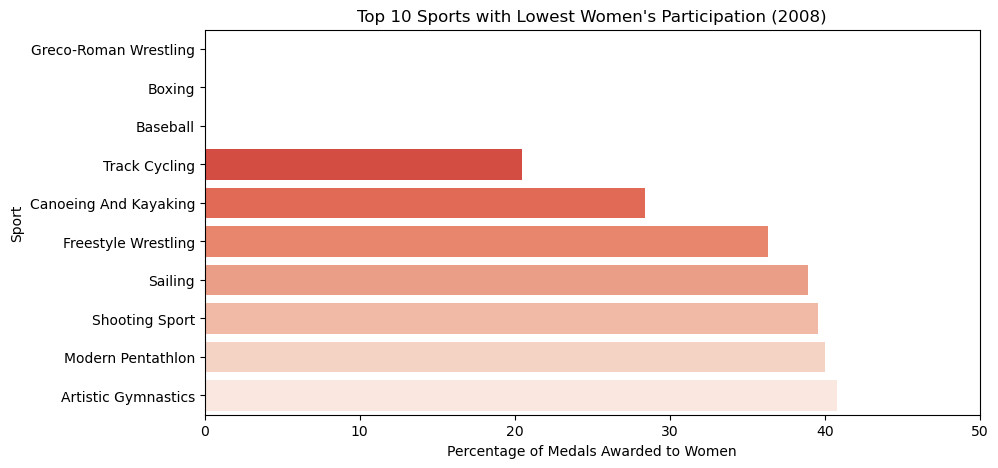

/var/folders/s1/80f726k51wg6ls9g2m9zgfjw0000gn/T/ipykernel_18985/4120414683.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_female_rep['Female Medal Share (%)'], y=top_10_female_rep.index, palette="Blues")


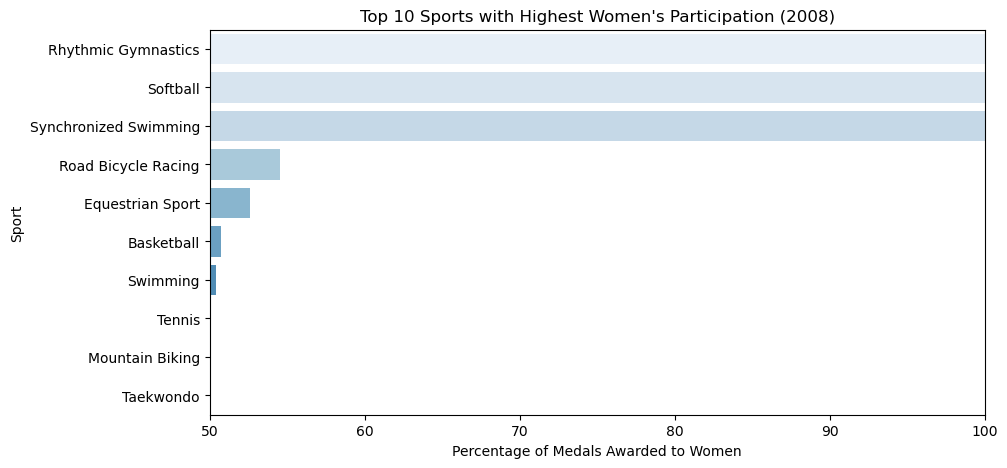

In [258]:
# Get top 10 sports where women had the LOWEST representation
bottom_10_female_rep = least_female_rep_sports.head(10)

# Get top 10 sports where women had the HIGHEST representation
top_10_female_rep = most_female_rep_sports.head(10)

# Plot the bottom 10 first (least female participation)
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_10_female_rep['Female Medal Share (%)'], y=bottom_10_female_rep.index, palette="Reds_r")

plt.title("Top 10 Sports with Lowest Women's Participation (2008)")
plt.xlabel("Percentage of Medals Awarded to Women")
plt.ylabel("Sport")
plt.xlim(0, 50)  # Limit x-axis to 50% because we're looking at underrepresentation
plt.show()

# Now plot the top 10 (most female participation)
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_female_rep['Female Medal Share (%)'], y=top_10_female_rep.index, palette="Blues")

plt.title("Top 10 Sports with Highest Women's Participation (2008)")
plt.xlabel("Percentage of Medals Awarded to Women")
plt.ylabel("Sport")
plt.xlim(50, 100)  # Limit x-axis to 50-100% because we're looking at overrepresentation
plt.show()